In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('bank-full.csv',sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [11]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes'] 

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
X_train.head(3000)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
13382,31,1,9,82,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
32641,35,195,17,203,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3991,24,77,16,236,2,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
8068,35,80,2,579,2,-1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
27484,37,105,21,197,2,157,4,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29523,59,514,3,261,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10723,54,1156,16,64,2,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
27343,57,24498,21,161,5,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
44842,31,0,22,173,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [17]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [18]:
y_pred=dt_model.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[11751,   226],
       [ 1145,   442]], dtype=int64)

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.91      0.98      0.94     11977\n        True       0.66      0.28      0.39      1587\n\n    accuracy                           0.90     13564\n   macro avg       0.79      0.63      0.67     13564\nweighted avg       0.88      0.90      0.88     13564\n'

In [21]:
accuracy_score(y_test, y_pred)

0.8989236213506341

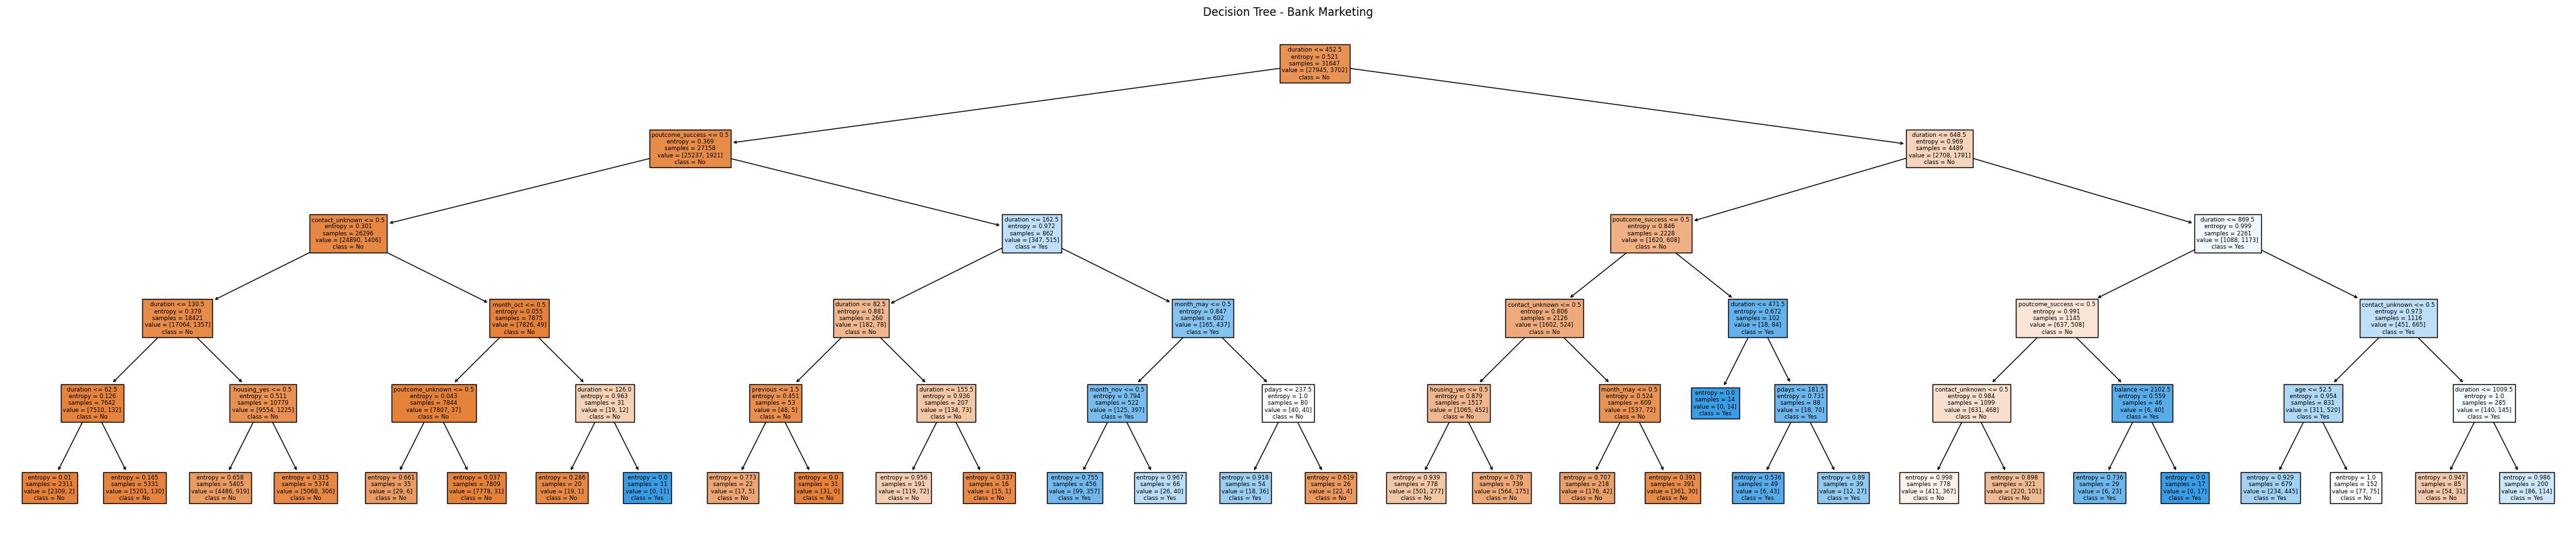

In [23]:
plt.figure(figsize=(50, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree - Bank Marketing")
plt.show()

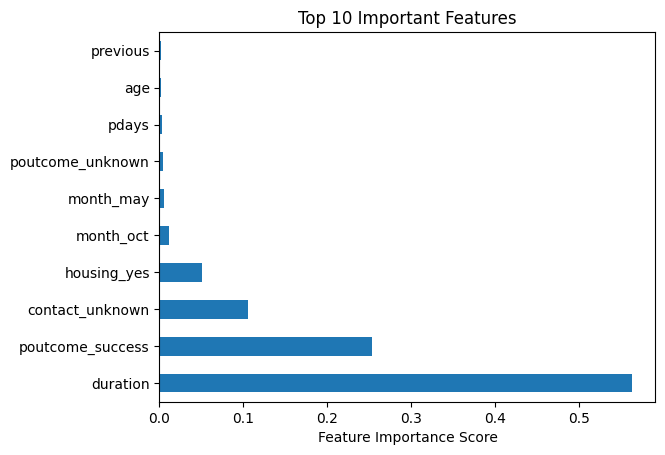

In [24]:
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title="Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()